# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

План на проект: 

1. Изучим данные. Проведем подготовку данных для моделирования.
2. Обучим модель для каждого отдельного региона (всего их три - geo_data_0, geo_data_1, geo_data_2)
3. Составим функцию расчёта прибыли в регионе.
4. Посчитать прибыль и вероять убытка за каждый регион и обосновать выбор региона. Посчитаем прибыль и риски в каждом регионе и обоснуем выбор региона. 
5. Сделать финальный вывод поп проекту

## Загрузка и подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

Каждый регион предлагаю загружать в отделный датафрейм.


In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Напишу сразу функцию для проверки уникальных значений 

In [5]:
def info_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [6]:
info_columns(geo_data_0)

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]


In [7]:
info_columns(geo_data_1)

Уникальные значения столбца id
['kBEdx' '62mP7' 'vyE1P' ... '09gWa' 'rqwUm' 'relB0']
Уникальные значения столбца f0
[-15.00134818  14.27208781   6.26318735 ...  -7.37889139   0.66571381
  -3.42613898]
Уникальные значения столбца f1
[-8.27599995 -3.47508322 -5.94838579 ... -3.08410387 -6.15259286
 -7.7942742 ]
Уникальные значения столбца f2
[-5.87601369e-03  9.99182737e-01  5.00116016e+00 ...  4.99865060e+00
  1.00014635e+00 -3.29851829e-03]
Уникальные значения столбца product
[  3.17910258  26.95326103 134.76630516 137.94540774  84.03888568
 110.99214671  53.90652206   0.         107.81304413  57.08562465
  30.13236361  80.85978309]


In [8]:
info_columns(geo_data_2)

Уникальные значения столбца id
['fwXo0' 'WJtFt' 'ovLUW' ... 'tKPY3' 'nmxp2' 'V9kWn']
Уникальные значения столбца f0
[-1.1469871   0.2627779   0.19458728 ... -1.19993432 -2.41989641
 -2.55142066]
Уникальные значения столбца f1
[ 0.96332792  0.26983896  0.289035   ... -2.95763723  2.41722066
 -2.02562514]
Уникальные значения столбца f2
[-0.82896492 -2.53018652 -5.58643277 ...  5.219411   -5.54844392
  6.09089066]
Уникальные значения столбца product
[ 27.75867323  56.06969663  62.87191005 ... 157.08007975  51.79525299
 102.77576749]


**ВЫВОДЫ**

Значения данных:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

Выводы по данным:
- пропущенные значения отсутствуют 
- столбец id не нужен, предлагаю его удалить 

Удаляем стоблец id

In [9]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

Создадим функцию для проверки количества нулевых значения и выведем это в процентном содержании 

In [10]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

In [11]:
check_zeros(geo_data_0, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [12]:
check_zeros(geo_data_1, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [13]:
check_zeros(geo_data_2, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [14]:
geo_data_0[geo_data_0['product'] == 0]

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.0


In [15]:
geo_data_1[geo_data_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


In [16]:
geo_data_2[geo_data_2['product'] == 0]

,f0,f1,f2,product
68149,-0.865596,-1.615247,-4.126441,0.0


Построим гистрограмы для данных по столбцу product

In [17]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

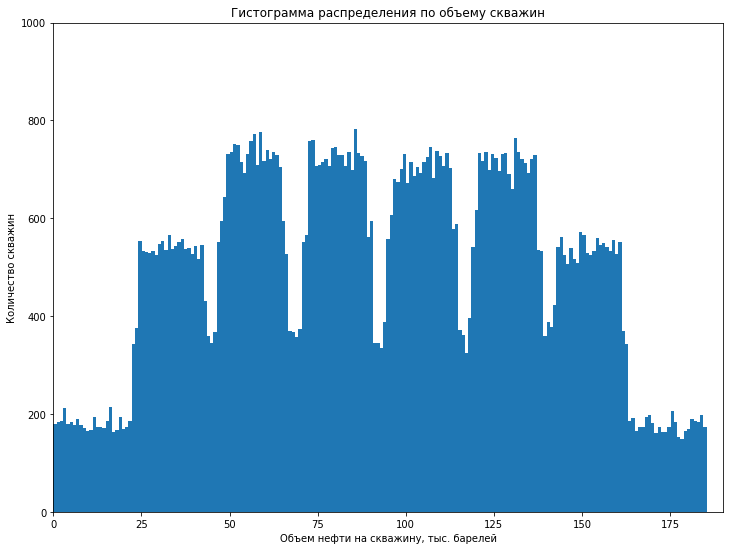

In [18]:
oil_hist(geo_data_0['product'], 200, 190, 1000)

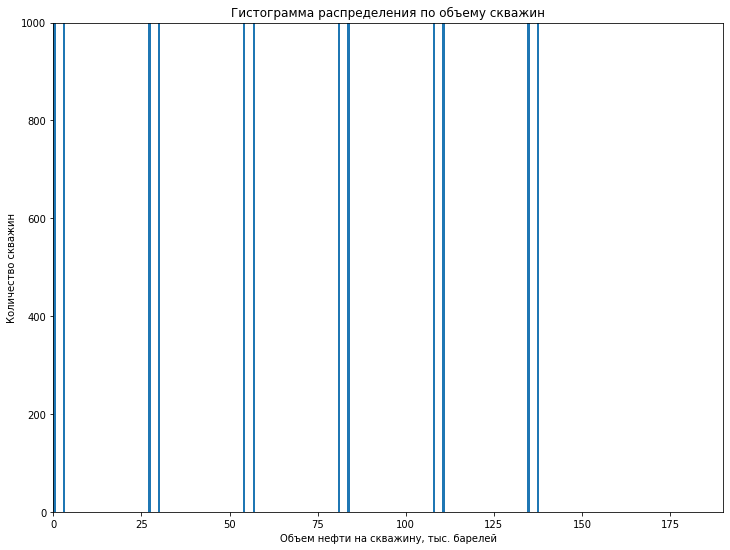

In [19]:
oil_hist(geo_data_1['product'], 200, 190, 1000)

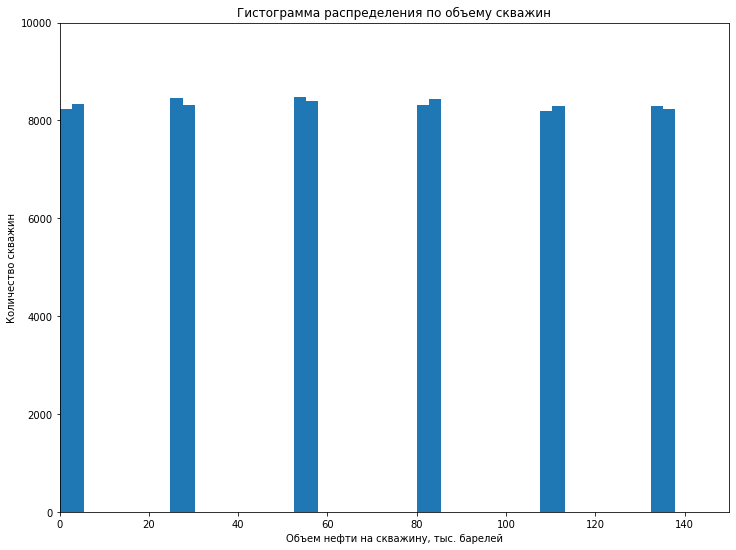

In [20]:
oil_hist(geo_data_1['product'], 50, 150, 10000)

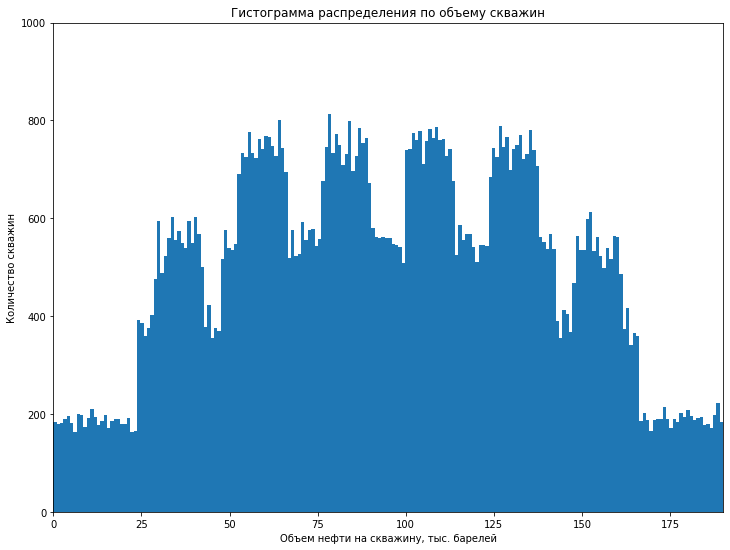

In [21]:
oil_hist(geo_data_2['product'], 200, 190, 1000)


Признаками для модели будут:

- f0
- f1
- f2

Целевым признаком является - product 

### ВЫВОДЫ ПО 1 ПУНКТУ



- Данные подготовили к обучению. 
- Во втором месторождении (geo_data_1) около 8% месторождений не имеет значения в столбце product. Сравнивая такие же значения из первого и третьего месторождений можем догадаться о том, что данные либо потеряли, либо их даже не исследовали (кол-во барелей нефти в этом регионе)
- По гистрограммам можем сдлеать вывод, что 1 и 3 месторождения распредления скажин близко к нормальному. Во втором же регионе распрпделение достаточно странное : от 0 до 5 барррелей(с шагом 15-20) равномерно распределились 100000 значений. 


## Обучение и проверка модели

Бдуем проверять качество можели линейной регрессии с текущими значениями признаков и будем масштабировать. Проверять будем на первом месторождении - geo_data_0.

Выполним разбивку неподготовленного датафрейма

In [22]:
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=123456)
    
    return features_train, features_valid, target_train, target_valid

In [23]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = test_split(geo_data_0, 'product')

features_train_0.head()

,f0,f1,f2
1240,0.619115,-0.464264,1.387821
90593,0.591996,-0.423919,0.723207
73055,0.017411,0.383767,1.967807
27446,-0.187932,0.886578,1.557773
52526,-0.411091,0.943768,-0.656031


In [24]:
def test_split_scaled(df, numeric, target):
    geo_data_s = df.copy()

    features_s = geo_data_s.drop([target] , axis=1)
    target_s = geo_data_s[target]

    features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(
        features_s, target_s, test_size=0.25, random_state=123456)

    scaler = StandardScaler()
    scaler.fit(features_train_s[numeric])
    features_train_s[numeric] = scaler.transform(features_train_s[numeric])
    features_valid_s[numeric] = scaler.transform(features_valid_s[numeric])

    return features_train_s, features_valid_s, target_train_s, target_valid_s

- features - данные без масштаба
- features_s - данные с масштабом

Попробуем провести обучение без изменения данных

In [25]:
model = LinearRegression()

model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE :', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE : 37.80046993478272


Проверим каково RMSE на маштабированных данных.

In [26]:
features_train_0s, features_valid_0s, target_train_0s, target_valid_0s = test_split_scaled(
                                                                        geo_data_0, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_0s, target_train_0s)
predicted_target_0s = model.predict(features_valid_0s)
print('RMSE :', mean_squared_error(target_valid_0s, predicted_target_0s)**0.5)

RMSE : 37.80046993478272


In [27]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(geo_data_1, 'product')
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE :', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = test_split_scaled(
                                                                        geo_data_1, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_1s, target_train_1s)
predicted_target_1s = model.predict(features_valid_1s)
print('RMSE :', mean_squared_error(target_valid_1s, predicted_target_1s)**0.5)

RMSE : 0.8904933206270059
RMSE : 0.8904933206270059


In [28]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(geo_data_2, 'product')
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE :', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = test_split_scaled(
                                                                        geo_data_2, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_2s, target_train_2s)
predicted_target_2s = model.predict(features_valid_2s)
print('RMSE :', mean_squared_error(target_valid_2s, predicted_target_2s)**0.5)

RMSE : 39.98039278339241
RMSE : 39.98039278339241


- Не похоже, что нам понадобится масштабировать данные. Предлагаю проверить показатель RMSE на других гиперпараметрах модели.

In [29]:
model = LinearRegression(normalize=True)
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE :', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE : 37.80046993478272


In [30]:
model = LinearRegression(fit_intercept=False)
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE :', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE : 61.22702378798092


Изменим стандартные значения гиперпараметров не улучшило нашу модель. 

Далее сделаем вывод предсказанного запаса с реальными и выведем RMSE.

In [31]:
model = LinearRegression()

def oil_predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=123456)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [32]:
geo_data_0_predicted, geo_data_0_rmse, geo_data_0_predicted_mean, geo_data_0_predicted_sum = oil_predict(geo_data_0, 'product')
print(geo_data_0_predicted.head())
print('RMSE -', geo_data_0_rmse)
print('Средний запас запасанного сырья :', geo_data_0_predicted_mean)

       real_product  predicted_product
65946     29.223158         101.698350
68716    137.244279          78.115855
75823    121.712971         105.592008
57450    134.701674          88.599469
1628      57.202133          59.039315
RMSE - 37.80046993478272
Средний запас запасанного сырья : 92.49286560032228


In [33]:
geo_data_1_predicted, geo_data_1_rmse, geo_data_1_predicted_mean, geo_data_1_predicted_sum = oil_predict(geo_data_1, 'product')
print(geo_data_1_predicted.head())
print('RMSE -', geo_data_1_rmse)
print('Средний запас запасанного сырья :', geo_data_1_predicted_mean)

       real_product  predicted_product
65946     84.038886          83.993838
68716      3.179103           3.527256
75823      0.000000          -1.184247
57450    110.992147         110.492034
1628      57.085625          56.510342
RMSE - 0.8904933206270059
Средний запас запасанного сырья : 69.03055429593262


In [34]:
geo_data_2_predicted, geo_data_2_rmse, geo_data_2_predicted_mean, geo_data_2_predicted_sum = oil_predict(geo_data_2, 'product')
print(geo_data_2_predicted.head())
print('RMSE -', geo_data_2_rmse)
print('Средний запас запасанного сырья :', geo_data_2_predicted_mean)

       real_product  predicted_product
65946     63.522508          82.377188
68716    109.720926          89.656294
75823    130.201741          87.699418
57450     29.057989          84.206149
1628      77.404805          61.549298
RMSE - 39.98039278339241
Средний запас запасанного сырья : 94.84835708988287


Посмторим общий запас на каждый регио по предсказанным данным

In [35]:
print('Суммарный предсказанный запас в позиции 0 :', geo_data_0_predicted_sum)
print('Суммарный реальный запас в позиции 0 :', geo_data_0_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 1 :', geo_data_1_predicted_sum)
print('Суммарный реальный запас в позиции 1 :', geo_data_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2 :', geo_data_2_predicted_sum)
print('Суммарный реальный запас в позиции 2 :', geo_data_2_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 0 : 2312321.640008057
Суммарный реальный запас в позиции 0 : 2329745.403482835

Суммарный предсказанный запас в позиции 1 : 1725763.8573983153
Суммарный реальный запас в позиции 1 : 1725686.9606435746

Суммарный предсказанный запас в позиции 2 : 2371208.9272470716
Суммарный реальный запас в позиции 2 : 2374453.25313946


### ВЫВОДЫ ПО 2 ПУНКТУ

- Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме предсказанных значений. Лучшего всего модель предскаывает запасы во втором регионе со значением RMSE - 0.89
- Могу конечно делать ставку на то, что утерянные данные из второго региона сказзались на модели и она сильно переобучилась у меня ¯\_(ツ)_/¯
- Из-за утерянных данных и малого запаса в среднем на второе месторождение не вижу смысла рассматривать его как прибыльное. 
- Изучать на прибыль и риски будем все регионы всё равно, но думаю выбор будет между 1 или 3 регионом. 

## Подготовка к расчёту прибыли

In [36]:
budget = 1e+07
chosen_points = 500
best_points = 200
price_per_barrel = 450

Рассчитаем выручку сырья на 200 месторождениях. Найдём среднее кол-во продукта в месторождениях необходимое для этого

In [37]:
average_profit_per_point = budget / best_points
print('Средняя прибыль на лучшую точку :', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Средний объем нефти на точку :',average_barrels_per_point, 'тыс. барелей')

average_barrels = budget / price_per_barrel
print('Средний объем нефти на регион :',average_barrels, 'тыс. барелей')

Средняя прибыль на лучшую точку : 50000.0 тыс.руб.
Средний объем нефти на точку : 111.11111111111111 тыс. барелей
Средний объем нефти на регион : 22222.222222222223 тыс. барелей


In [38]:
print('Средний запас фактичекой нефти на скважину в регионе 1', geo_data_0['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', geo_data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', geo_data_2['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.50000000000001
Средний запас фактичекой нефти на скважину в регионе 2 68.82500000000002
Средний запас фактичекой нефти на скважину в регионе 3 95.00000000000004


 Создадим функцию для расчёта прибыли для 500 равзведанных точек и построим гистгограммы длярасперделения предсказанны значений

In [39]:
def oil_profit_calculation(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

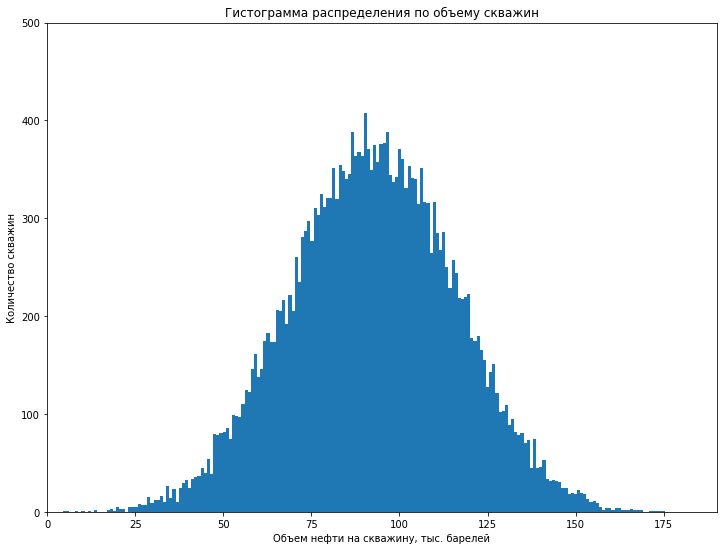

In [40]:
oil_hist(geo_data_0_predicted['predicted_product'], 200, 190, 500)

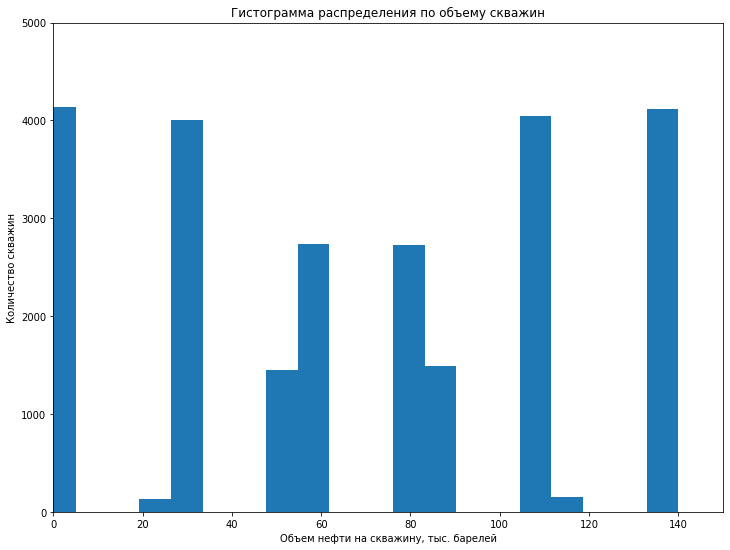

In [41]:
oil_hist(geo_data_1_predicted['predicted_product'], 20, 150, 5000)

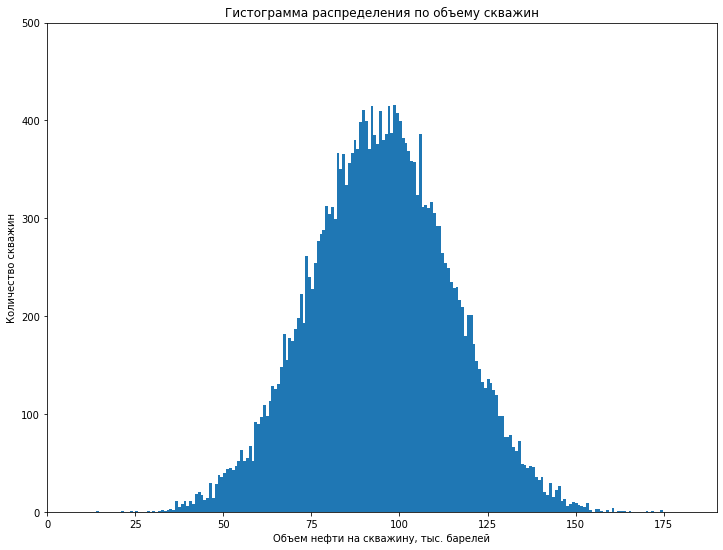

In [42]:
oil_hist(geo_data_2_predicted['predicted_product'], 200, 190, 500)

### ВЫВОДЫ ПО 3 ПУНКТУ


- Подготовили среднюю оценку прибыли на скважину и средний объём нефти на скважину. Создали фунцию для расчёта прибыли.
- Изучили средние фактические запасы. Для 1 и 3 региона имеется высокая вероятность окупить затраты. Разброс значений вокруг среднего (около 95) говорит о том, что существует большое количество скважин, где запасы большег необходимого среднего
- Во втором регионе значений больше 100 достаточно много, но среднее значение всего около 70.

## Расчёт прибыли и рисков 

In [43]:
state = np.random.RandomState(123456)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [44]:
average_0, lower_0, upper_0, risk_0 = bootstrap_1000(geo_data_0_predicted['real_product'], 
                                                     geo_data_0_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Вероятьносьб убытка {:.2%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону = 484679.22 тыс.руб.
95% доверительный интервал от -5476.87 до 984467.70 тыс.руб.
Процент риска 2.70%


In [45]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(geo_data_1_predicted['real_product'], 
                                                     geo_data_1_predicted['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Вероятность убытка {:.2%}'.format(risk_1))

Данные по второму региону.
Средняя прибыль по региону = 449277.95 тыс.руб.
95% доверительный интервал от 30327.99 до 847277.70 тыс.руб.
Процент риска 1.40%


In [46]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(geo_data_2_predicted['real_product'], 
                                                     geo_data_2_predicted['predicted_product'])
print('Данные по третьему региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Вероятность убытка {:.2%}'.format(risk_2))

Данные по третьему региону.
Средняя прибыль по региону = 364219.60 тыс.руб.
95% доверительный интервал от -122525.09 до 857751.53 тыс.руб.
Процент риска 7.20%


### ВЫВОДЫ ПО 4 ПУНКТУ

- Рассчитали прибыль, интервал и вероятность убытка
- Смотря на результаты я бы выбрал самым потенциальным регионом - 2. Так как у него самая маленькая вероятность убытка. Первый регион тоже можно попробовать, но так как доверительный интервал у квторого региона будет получше, то брал бы только его. 

## Общий вывод

В проекте мы сделали:
- Изучили данные, провели их подготовку к моделировнию
- Обучили модель для каждого региона
- Составили функцию расчёта прибыли в регионе 
- Посчитали прибыль и вероятность убытка в каждом регионе и обосновали выбор региона для разработки
- Итогово выбрали второй регион как наилучший для разработки